In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn import cross_validation, metrics
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, mean_squared_error, r2_score

In [3]:
X_train = pd.read_csv("/Users/nyuuser/Desktop/X_train.csv")
y_train = pd.read_csv("/Users/nyuuser/Desktop/y_train.csv")

In [4]:
X_train.head()

,Unnamed: 0,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,117214.0,0.128865,67.0,0.0,0.352588,5833.0,8.0,0.0,1.0,0.0,0.0
1,1,144723.0,0.179496,32.0,1.0,0.245922,5700.0,10.0,1.0,0.0,0.0,0.0
2,2,27113.0,0.528844,53.0,0.0,0.491452,11990.0,15.0,0.0,3.0,0.0,3.0
3,3,142706.0,0.018850,52.0,0.0,0.299567,5083.0,15.0,0.0,2.0,0.0,0.0
4,4,14250.0,0.569364,32.0,2.0,0.649189,4500.0,10.0,0.0,1.0,2.0,2.0


In [5]:
X_train.shape

(80546, 12)

In [6]:
X_train = X_train.iloc[:, 2:]
X_train.shape

(80546, 10)

In [7]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.128865,67.0,0.0,0.352588,5833.0,8.0,0.0,1.0,0.0,0.0
1,0.179496,32.0,1.0,0.245922,5700.0,10.0,1.0,0.0,0.0,0.0
2,0.528844,53.0,0.0,0.491452,11990.0,15.0,0.0,3.0,0.0,3.0
3,0.018850,52.0,0.0,0.299567,5083.0,15.0,0.0,2.0,0.0,0.0
4,0.569364,32.0,2.0,0.649189,4500.0,10.0,0.0,1.0,2.0,2.0


In [8]:
y_train.shape

(80546, 1)

In [9]:
y_train.head()

,y
0,0
1,0
2,0
3,0
4,0


both X and y are dataframes

In [10]:
y_train = y_train.squeeze()
print(type(y_train))
y_train.head()

<class 'pandas.core.series.Series'>


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [11]:
print(X_train.shape)
print(y_train.shape)

(80546, 10)
(80546,)


In [12]:
#read in testing data
X_test = pd.read_csv("/Users/nyuuser/Desktop/X_test.csv")
y_test = pd.read_csv("/Users/nyuuser/Desktop/y_test.csv")

X_test = X_test.iloc[:, 1:]
print(X_test.shape)
X_test.head()

(10890, 10)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.380893,43.0,0.0,0.860000,4899.0,7.0,0.0,2.0,0.0,2.0
1,0.068433,67.0,0.0,0.226901,18333.0,19.0,0.0,1.0,0.0,2.0
2,0.055606,63.0,1.0,0.049925,9974.0,5.0,0.0,0.0,0.0,2.0
3,0.000000,25.0,0.0,0.000000,5000.0,1.0,0.0,0.0,0.0,0.0
4,1.000000,41.0,0.0,0.163138,4958.0,4.0,0.0,0.0,0.0,0.0


In [13]:
print(y_test.shape)
y_test.head()
y_test = y_test.squeeze()
print(type(y_test))
print(y_test.shape)
y_test.head()

(10890, 1)
<class 'pandas.core.series.Series'>
(10890,)


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### Neural Network

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 13,249
Trainable params: 13,249
Non-trainable params: 0
_________________________________________________________________
[0.500074491594865

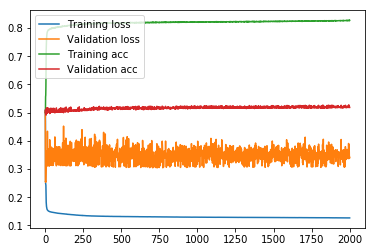

In [14]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dense(64,kernel_regularizer = regularizers.l2(0.001),activation = 'relu'))
model.add(layers.Dense(64,kernel_regularizer = regularizers.l2(0.001),activation = 'relu'))
model.add(layers.Dense(64,kernel_regularizer = regularizers.l2(0.001),activation = 'relu'))
#**Above: add "L2 weight regularization" to the neural network

model.add(layers.Dense(1,activation = 'sigmoid'))
model.compile(optimizer = "adagrad", loss='mse', metrics = ['acc'])
history = model.fit(X_train, y_train, epochs = 2000, verbose = 0, validation_data = (X_test,y_test))
model.summary()

# Use Keras history object to check performance
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs,loss, label = "Training loss")
plt.plot(epochs,val_loss, label = "Validation loss")
plt.legend()

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc)+1)


plt.plot(epochs,acc, label = "Training acc")
plt.plot(epochs,val_acc, label = "Validation acc")
plt.legend()

print(acc)
print(val_acc)




In [16]:
print("Training Accuracy score:", acc[-1])

Training Accuracy score: 0.8270181014575522


In [17]:
print("Testing Accuracy score:", val_acc[-1])

Training Accuracy score: 0.5184573002809554


In [22]:
model_scores = model.predict(X_train)
model_scores[:5,:]
print("Training AUC score:", roc_auc_score(y_train, model_scores))

Training AUC score: 0.896478396982163


In [23]:
model_scores = model.predict(X_test)
model_scores[:5,:]
print("Testing AUC score:", roc_auc_score(y_test, model_scores))

Testing AUC score: 0.5495290495741285
